In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd


In [4]:

od.download("https://www.kaggle.com/competitions/electricity-consumption")
df = pd.read_csv("./electricity-consumption/train.csv")

Skipping, found downloaded files in ".\electricity-consumption" (use force=True to force download)


In [5]:
df.head()

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   total     34946 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [7]:
df = df[:1000]

In [8]:
# просто удаляем пропуски
df = df[~df['total'].isna()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  999 non-null    object 
 1   total     999 non-null    float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%d.%m.%Y %H:%M:%S")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  999 non-null    datetime64[ns]
 1   total     999 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.4 KB


In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['season'] = df['datetime'].dt.quarter
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofyear'] = df['datetime'].dt.day_of_year
df['dayofweek'] = df['datetime'].dt.day_of_week
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

df.head()

,datetime,total,year,month,season,day,hour,dayofyear,dayofweek,is_weekend
1,2005-01-01 01:00:00,154139.8084,2005,1,1,1,1,1,5,1
2,2005-01-01 02:00:00,157818.3593,2005,1,1,1,2,1,5,1
3,2005-01-01 03:00:00,149310.6991,2005,1,1,1,3,1,5,1
4,2005-01-01 04:00:00,138282.0380,2005,1,1,1,4,1,5,1
5,2005-01-01 05:00:00,132032.7479,2005,1,1,1,5,1,5,1


In [12]:
import math
import numpy as np

#добавление тригонометрических функций от данных
def add_trigonom(df):
    df['sin_month'] = df['month'].apply(math.sin)
    df['cos_month'] = df['month'].apply(math.cos)

    df['sin_hour'] = df['hour'].apply(math.sin)
    df['cos_hour'] = df['hour'].apply(math.cos)

    df['sin**2_hour'] = df['sin_hour'] * df['sin_hour']
    df['cos**2_hour'] = df['cos_hour'] * df['cos_hour']

    df['hour_sin'] = (df['hour'] / 23 * 2 * np.pi).apply(math.sin)
    df['hour_cos'] = (df['hour'] / 23 * 2 * np.pi).apply(math.cos)

    df['month_sin'] = ((df['month'] - 1) / 11 * 2 * np.pi).apply(math.sin)
    df['month_cos'] = ((df['month'] - 1) / 11 * 2 * np.pi).apply(math.cos)

    df['hour_sin**2'] = df['hour_sin'] * df['hour_sin']
    df['month_cos**2'] = df['month_cos'] * df['month_cos']

    day = 24
    year = 365.2425*day

    df['day_sin'] = (df.index.hour * 2 * np.pi / day)
    df['day_sin'] = df['day_sin'].apply(math.sin)
    df['day_cos'] = (df.index.hour * 2 * np.pi / day)
    df['day_cos'] = df['day_cos'].apply(math.cos)
    df['year_sin'] = (df.index.hour * 2 * np.pi / year)
    df['year_sin'] = df['year_sin'].apply(math.sin)
    df['year_cos'] = (df.index.hour * 2 * np.pi / year)
    df['year_cos'] = df['year_cos'].apply(math.cos)

    return df

df = df.set_index('datetime')
df = add_trigonom(df)

df
df = df.reset_index(drop=True)
df = df.astype({'total': 'int32'})

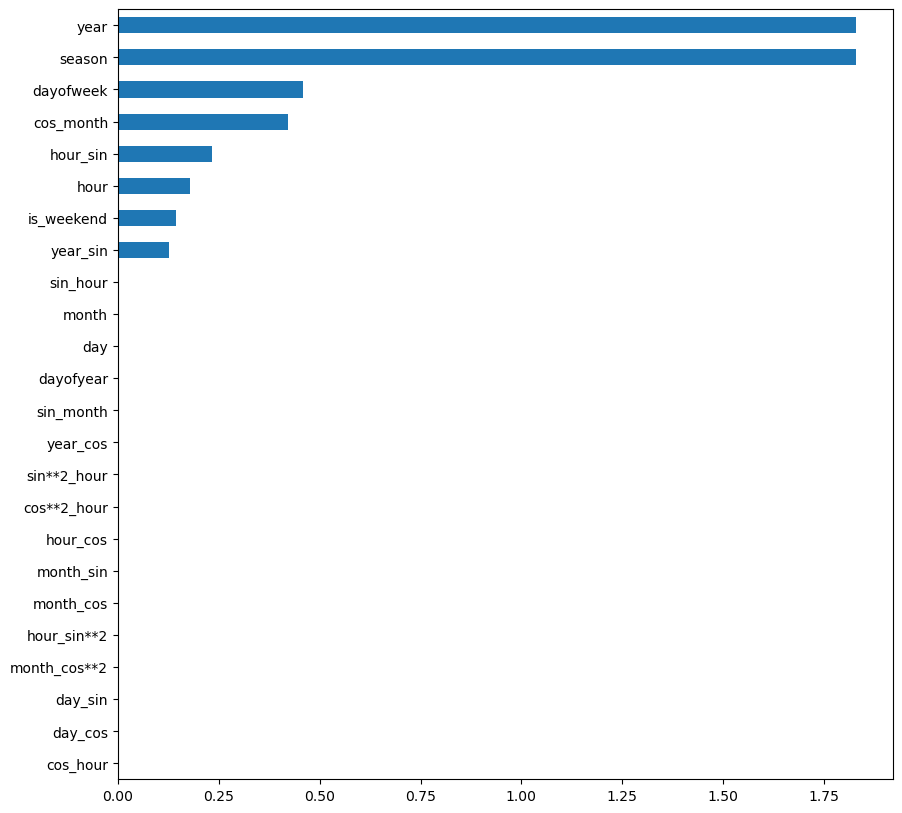

In [13]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X = df.drop(columns=['total'])
y = df['total']

importances = mutual_info_classif(X, y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

plt.figure(figsize=(10,10))
feature_importances.plot(kind='barh')
plt.show()

In [14]:
!pip install git+https://github.com/jundongl/scikit-feature.git


  Cloning https://github.com/jundongl/scikit-feature.git to c:\users\dimac\appdata\local\temp\pip-req-build-734gkjz3
  Resolved https://github.com/jundongl/scikit-feature.git to commit 48cffad4e88ff4b9d2f1c7baffb314d1b3303792
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skfeature: filename=skfeature-1.0.0-py3-none-any.whl size=62029 sha256=9b919e3f06e36fc9ab688962d71dc53bc432a6b0f2dbd0abb33c224ccf181213
  Stored in directory: C:\Users\dimac\AppData\Local\Temp\pip-ephem-wheel-cache-7ip4r_hq\wheels\50\20\8b\bfa08b2fdbc08bb587a657c2b5eed472e3125f1c2783cd501a
Successfully built skfeature


  Running command git clone --filter=blob:none --quiet https://github.com/jundongl/scikit-feature.git 'C:\Users\dimac\AppData\Local\Temp\pip-req-build-734gkjz3'


c:\Users\dimac\anaconda3\Lib\site-packages\skfeature\function\similarity_based\fisher_score.py:53: RuntimeWarning: divide by zero encountered in divide
  score = 1.0/lap_score - 1


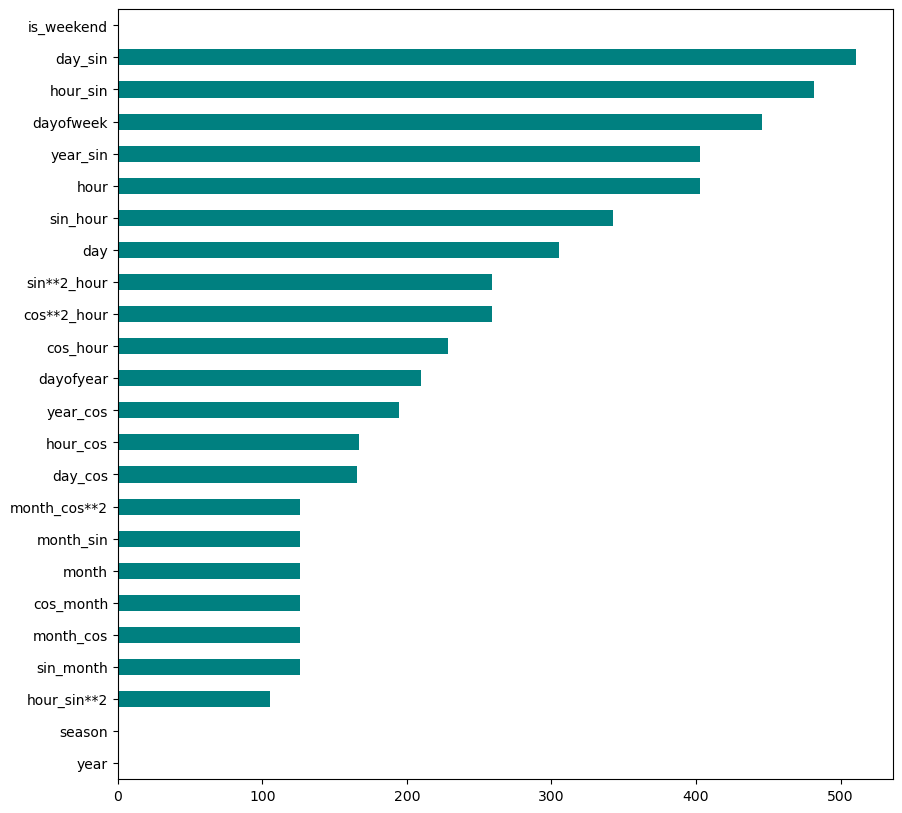

In [15]:
import pandas as pd
import numpy as np
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
ranks = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())

# Делаем график наших "фич"
# Где data - ваш датасет
feature_importances = pd.Series(ranks, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

plt.figure(figsize=(10,10))
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['total'])
y = df['total']

clf = LinearRegression()

sfs = SequentialFeatureSelector(clf, n_features_to_select = 5)

sfs.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [17]:
sfs.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False,  True, False])

In [18]:
pd.DataFrame(sfs.support_, index=X.columns, columns=["Rank"])

,Rank
year,False
month,False
season,False
day,False
hour,False
dayofyear,False
dayofweek,False
is_weekend,False
sin_month,False
cos_month,False


In [19]:
from sklearn.feature_selection import RFE
import numpy as np

clf = LinearRegression()

rfe = RFE(clf, n_features_to_select=6)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [20]:
pd.DataFrame(rfe.support_, index=X.columns, columns=["Rank"])

,Rank
year,False
month,False
season,False
day,False
hour,True
dayofyear,False
dayofweek,False
is_weekend,False
sin_month,False
cos_month,False
